In [ ]:
# http://www.quantinsti.com/blog/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/

In [2]:
%matplotlib inline

                   Open         High          Low        Close  Volume  \
Date                                                                     
2016-05-12  7871.450195  7916.049805  7849.649902  7900.399902  152700   
2016-05-13  7881.000000  7881.000000  7784.200195  7814.899902  179500   
2016-05-16  7831.200195  7873.899902  7772.149902  7860.750000  205200   
2016-05-17  7896.850098  7940.100098  7879.700195  7890.750000  183400   
2016-05-18  7846.750000  7882.049805  7810.750000  7870.149902  156400   
2016-05-19  7875.500000  7876.200195  7766.799805  7783.399902  170400   
2016-05-20  7792.200195  7812.399902  7735.750000  7749.700195  157000   
2016-05-23  7813.950195  7820.600098  7722.200195  7731.049805  172000   
2016-05-24  7738.049805  7761.549805  7715.799805  7748.850098  147000   
2016-05-25  7811.799805  7941.200195  7809.299805  7934.899902  176200   
2016-05-26  7974.450195  8083.000000  7948.500000  8069.649902  264300   
2016-05-27  8081.950195  8164.200195  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f747f6ff890>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f747d177490>], dtype=object)

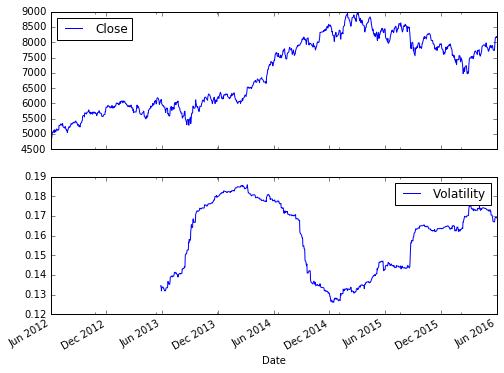

In [3]:
## Computing Volatility
# Load the required modules and packages
import numpy as np
import pandas as pd
import pandas.io.data as web
# Pull NIFTY data from Yahoo finance 
NIFTY = web.DataReader('^NSEI',data_source='yahoo',start='6/1/2012', end='6/1/2016')
# Compute the logarithmic returns using the Closing price 
NIFTY['Log_Ret'] = np.log(NIFTY['Close'] / NIFTY['Close'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
NIFTY['Volatility'] = pd.rolling_std(NIFTY['Log_Ret'], window=252) * np.sqrt(252)
print(NIFTY.tail(15))
# Plot the NIFTY Price series and the Volatility
NIFTY[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

In [5]:
# Sharpe Ratio 
import numpy as np
def sharpe(returns, rf, days=252):
    volatility = returns.std() * np.sqrt(days) 
    sharpe_ratio = (returns.mean() - rf) / volatility
    return sharpe_ratio

In [6]:
import numpy as np
def information_ratio(returns, benchmark_returns, days=252):
    return_difference = returns - benchmark_returns 
    volatility = return_difference.std() * np.sqrt(days) 
    information_ratio = return_difference.mean() / volatility
    return information_ratio

In [7]:
# Modigliani Ratio
import numpy as np
def modigliani_ratio(returns, benchmark_returns, rf, days=252):
    volatility = returns.std() * np.sqrt(days) 
    sharpe_ratio = (returns.mean() - rf) / volatility 
    benchmark_volatility = benchmark_returns.std() * np.sqrt(days)
    m2_ratio = (sharpe_ratio * benchmark_volatility) + rf
    return m2_ratio